# Show any parameter

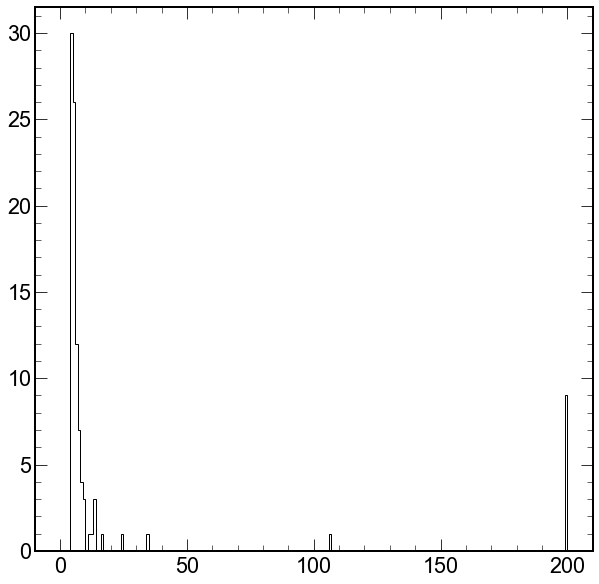

In [1]:
import modules.data.info.ShowParam
# from importlib import reload
#reload(modules.info.ShowParam)
modules.data.info.ShowParam.ShowParamHist('nTracks', 200, (0,200))


## cache size vs chunks len 


In [3]:
import modules.data.info.ShowParam
# from importlib import reload
#reload(modules.info.ShowParam)
modules.data.info.ShowParam.ShowParamHist('nTracks', 200, (0,200))


10MB [31493, 33047, 32963, 26505, 26865, 27270, 27045, 27450, 28215, 28980, 27900]
100MB [31493, 33047, 32963, 26505, 26865, 27270, 27045, 27450, 28215, 28980, 27900]
1000MB [31493, 33047, 32963, 26505, 26865, 27270, 27045, 27450, 28215, 28980, 27900]


In [6]:
myarray = awkward.JaggedArray.fromiter([[1.1, 2.2, 3.3], [], [4.4, 5.5]])
myarray

<JaggedArray [[1.1 2.2 3.3] [] [4.4 5.5]] at 0x02936ace06a0>